# 人工知能実験: おまけ

**目次**
- [](#AI-project-A)
- [](#AI-project-B)
- [](#AI-project-C)

:::{warning}
これは，必須課題ではありません．時間が余った人や興味がある人向けの資料です．

ただし，標準的な学力と技術力を持つ学生であれば，1つ目の課題Aまでは実施できるであろうことを期待して用意しています．
:::

In [1]:
# 本実験でほぼ毎回利用するライブラリ
import sys
import numpy as np

import IPython
import IPython.display
from IPython.display import display, Markdown

import matplotlib
from matplotlib import pyplot as plt  # hoge

# 人工知能実験で利用
from collections import deque
from dataclasses import dataclass
import networkx as netx

#
# DEBUG
#
print('*** System Information ***')
print(f'Python     : {sys.version}')
print(f'NumPy      : {np.__version__}')
print(f'Matplotlib : {matplotlib.__version__}')
print(f'NetworkX   : {netx.__version__}')


*** System Information ***
Python     : 3.12.3 (main, Aug 14 2025, 17:47:21) [GCC 13.3.0]
NumPy      : 2.3.2
Matplotlib : 3.10.5
NetworkX   : 3.5


In [2]:
%reload_ext autoreload
%autoreload 1
%aimport ebai

# 人工知能実験用の補助関数を定義したサブライブラリ（改変不可）
import ebai
ebai.ebai_info()

display(Markdown("**要確認：Revision 2025.1 以上が必要です**"))

/home/users/ecs/09B23523/exp-b/ai/ebai.py
> Revision 2025.1
> 更新日時：2025-10-03 11:18:05.715802
>
> Python     : 3.12.3 (main, Aug 14 2025, 17:47:21) [GCC 13.3.0]
> NumPy      : 2.3.2
> Matplotlib : 3.10.5
> NetworkX   : 3.5


**要確認：Revision 2025.1 以上が必要です**

以下は，これまでにない特殊なセルです．少し注意しながら，利用してください．

In [3]:
import ipywidgets

#%matplotlib inline
%matplotlib widget
#%matplotlib qt

    # - このセルは少し特殊な意味を持っています．
    #   - inline を指定
    #     - Jupyter Lab の標準の挙動です．入力セルの直下に描画されます．
    #     - inline ではインタラクティブ（対話的）な動作ができません＝(B)は実行不可
    #   - widget (または ipympl)を指定
    #     - Jupyter Lab の output 内に描画されますが，少しリッチな画面になります．
    #   - qt を指定
    #     - plot (subplots) のたびに別ウィンドウが立ち上がります
    # - 標準以外では，描画がおかしくなる可能性もありますので，注意してください．
    #   - Extra-Aまでの内容ならば，このセルはすべてコメントアウトしていても問題ありません．

#
# DEBUG
#
print('*** System Information ***')
print(f'ipywidgets : {ipywidgets.__version__}')  # <-- NEW!!
print(f'{matplotlib.get_backend()=}')
print(f'{matplotlib.rcsetup.all_backends=}')
print(f'{matplotlib.rcsetup.interactive_bk=}')


*** System Information ***
ipywidgets : 8.1.7
matplotlib.get_backend()='widget'
matplotlib.rcsetup.all_backends=['gtk3agg', 'gtk3cairo', 'gtk4agg', 'gtk4cairo', 'macosx', 'nbagg', 'notebook', 'qtagg', 'qtcairo', 'qt5agg', 'qt5cairo', 'tkagg', 'tkcairo', 'webagg', 'wx', 'wxagg', 'wxcairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']
matplotlib.rcsetup.interactive_bk=['gtk3agg', 'gtk3cairo', 'gtk4agg', 'gtk4cairo', 'macosx', 'nbagg', 'notebook', 'qtagg', 'qtcairo', 'qt5agg', 'qt5cairo', 'tkagg', 'tkcairo', 'webagg', 'wx', 'wxagg', 'wxcairo']


/tmp/ipykernel_26637/2453583141.py:24: MatplotlibDeprecationWarning: The all_backends attribute was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use ``matplotlib.backends.backend_registry.list_builtin()`` instead.
  print(f'{matplotlib.rcsetup.all_backends=}')
/tmp/ipykernel_26637/2453583141.py:25: MatplotlibDeprecationWarning: The interactive_bk attribute was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use ``matplotlib.backends.backend_registry.list_builtin(matplotlib.backends.BackendFilter.INTERACTIVE)`` instead.
  print(f'{matplotlib.rcsetup.interactive_bk=}')


(AI-project-A)=
## (Extra-A) グリッド型迷路の利用

**概要**

グリッド型迷路（ゲーム風のマス目で構成）からグラフへの変換関数を用意しました．  
自分なりの迷路を利用して，探索処理に関して考察をしてみるのも良いでしょう．

:::{warning}
迷路やグラフの作りこみに，あまり時間をかけすぎないように・・・  
グラフを作ることは，実験そのものの本質ではなく，実験の準備作業に過ぎません．  
「そのグラフ（あるいは，それらグラフ群）を使って，何を示したいのか？」を明確にしなくては，実験になりません．
:::

### (1) 迷路からグラフへの変換例

本資料用に，ebai.py には，いくつかのクラスや関数を用意しています．  
かなり難しいので，それら関数の内容を無理に読み解く必要はありません．

何ができるか，だけに絞って，以下のソースコードを読んでみてください．

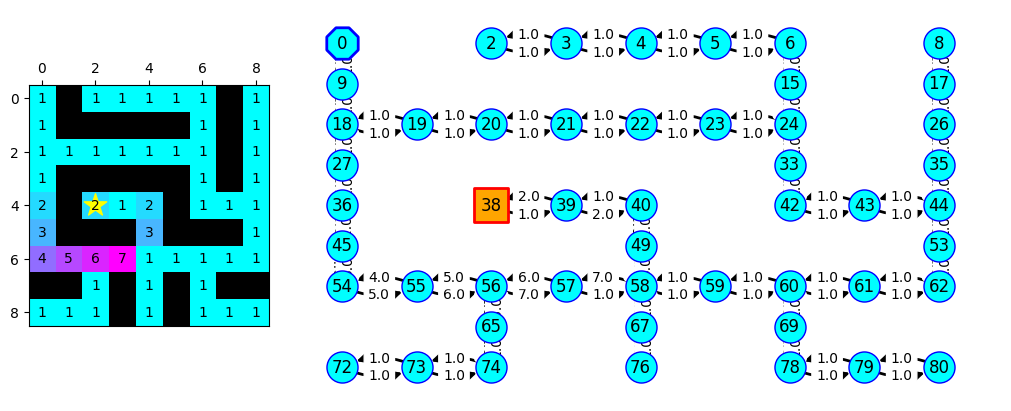

In [4]:
maze_def_str = """
1 0 1 1 1 1 1 0 1
1 0 0 0 0 0 1 0 1
1 1 1 1 1 1 1 0 1
1 0 0 0 0 0 1 0 1
2 0 2 1 2 0 1 1 1
3 0 0 0 3 0 0 0 1
4 5 6 7 1 1 1 1 1
0 0 1 0 1 0 1 0 0
1 1 1 0 1 0 1 1 1
"""
    # 迷路の定義です．
    # - (古めの?)RPGやシミュレーションゲームにおけるマス目マップをイメージしてください．
    #   - 簡単のため，常に左上(0,0)がスタートです．
    #   - 1 以上は，その数値の遷移コストを支払って移動できるマスです．
    #     - 数字は，整数で指定，かつ 8 以下を指定，としてください．
    #   - 0 は通れないマスです．

maze_goal = (3-1, 5-1)
    # 迷路のゴールです．
    # - pythonのリストの流儀に倣って 0 始まりの座標を指定する必要があります．
    # - "-1"をわざわざ書いているのは，1始まりで指定された座標からの変換を明示しています．

# Compile the maze_string to graph definitions
maze = ebai.MazeGraph(maze_def_str, maze_goal)
    # 意味は Shift + Tab でヘルプを確認してください．

# DEBUG
# - 図番号や図のサイズは適当に調整してください・・・
fig1 = plt.figure(1, figsize=(10, 4), layout='constrained', clear=True)
_gs = matplotlib.gridspec.GridSpec(1, 2, figure=fig1, width_ratios=[1, 3])
ax1 = fig1.add_subplot(_gs[0]), fig1.add_subplot(_gs[1])

maze.draw_maze(ax=ax1[0])
maze.draw_graph(ax=ax1[1], show_weight=True, nscale=0.5)
    # - nscale は，ノードの描画サイズを変える（0.8なら0.8倍の大きさ）オプションです．
plt.show()

### (2) 関数定義

:::{exercise}
最適経路探索をおこなう `dijkstra()` 関数と，Backtrackingを行う `backtrack()` 関数を定義してください．  
引数や戻り値の仕様は，関数定義として書かれたコメントを参照してください．
:::

backtrack は [AI-1](Practice_AI-1.ipynb#impl-backtracking) で実装済み（のはず）です．  
いずれの関数も，ある程度独自に拡張して構いません．この手のプログラムでは，引数の種別が増えがちです．  
Pythonの関数の引数の書き方にもいろいろありますので，工夫してみると，勉強になるかもしれません．
- 参考：https://docs.python.org/ja/3.12/glossary.html#term-parameter

In [5]:
import heapq
@dataclass
class State:
    id: int
    cost: float
    parent_id: int
    def __lt__(a, b):
        if a.cost != b.cost:
            return a.cost < b.cost

In [6]:
def dijkstra(graph_edgedict, graph_target, graph_start):
    """ダイクストラ法によるグラフ探索
    Parameters
    ----------
    ??
        探索対象のグラフの？？（注：本セル先頭に書かれている _1 や _2 も自分で書き換えてください）
    ??
        探索対象のグラフの？？

    Returns
    -------
    closed_list
        探索処理によって構築された探索木（探索結果）

    Note
    ----
    - 自分のDijkstra's algorithmの実装を書き写してください．
      - 15 x 15 = 225 nodes の音声認識グラフを探索すると，160回ぐらいのループになります．
        AI-2で動作を十分検証しているのであれば，不要な print は，全てコメントアウトしましょう．
      - また，ループ中に描画をすると大変なことになる可能性が高いです．
        PRACTICEとして「最後のみ描画する」と指示をしているので，そんなことになる人は少ないはずですが・・・
    - 戻り値について
      - 少なくとも，後で Backtracking をするための情報を戻す必要はあります．
      - 念のため補足しておきますが，「経路は探索結果（の一つ）である」は真ですが，「探索結果は経路である」は偽です．
    """
    open_list = []
    heapq.heapify(open_list)
    heapq.heappush(open_list, State(graph_start, cost=0, parent_id=-1))
    closed_list = dict()

    loop_count = 0
    while len(open_list) > 0 and loop_count < 200:
        loop_count += 1
        cur_state = heapq.heappop(open_list)
        closed_list[cur_state.id] = cur_state

        if graph_target in closed_list:
            break

        candidate_state_nodes = graph_edgedict[cur_state.id]

        for _dst_id, _weight in candidate_state_nodes:
            candidate_state = State(
                id=_dst_id,
                cost=_weight + cur_state.cost,
                parent_id=cur_state.id
            )
            if candidate_state.id in closed_list:
                continue

            _exist_state = [x for x in open_list if x.id == candidate_state.id]
            _exist_state = _exist_state[0] if _exist_state else None
            if _exist_state is None:
                heapq.heappush(open_list, candidate_state)
            elif candidate_state.cost < _exist_state.cost:
                open_list.remove(_exist_state)
                open_list.append(candidate_state)
                heapq.heapify(open_list)
            else:
                pass

    return closed_list
        # Noneを返すのは妥当ではありません．皆さんが実装するときは消してください．

In [7]:
def backtrack(closed_list, graph_target, graph_start):
    """探索結果に対するBacktracking処理により，スタートからゴールまでの経路を得る
    Parameters
    ----------
    closed_list
        探索処理によって構築された探索木（探索結果）
    graph_target
        グラフ探索におけるゴールとなるノードのID
    graph_start (default: 0)
        グラフ探索におけるスタートとなるノードのID

    Returns
    -------
    route
        経路
    total_cost
        コスト

    Note
    ----
    - 自分の Backtracking の実装を書き写してください．(AI-1 解説A3)
      - AI-2の実装を通して：
        - 引数として必要な変数（探索結果として得るべき情報）を理解しているはずです．
        - 経路として戻すべき変数を，PRACTICEにて，皆さんは正しく認識してきたはずです．
      - コストは，探索「成功」時の，最終ノードのコストです．
        - 探索に失敗した場合，あるいは，Backtrackingに失敗した場合は，
          関数としては，"空配列"と"無意味なコスト値"を返すのが一案となるでしょう．
    """
    route = deque([])
    bt_node_id = graph_target
    bt_node_cost = 0

    while bt_node_id != graph_start:
        route.appendleft(bt_node_id)
        bt_node_id = closed_list.get(bt_node_id, State(id=-1, cost=-1, parent_id=-9)).parent_id
        bt_node_cost += closed_list.get(bt_node_id, State(id=-1, cost=-1, parent_id=-9)).cost

    if bt_node_id == graph_start:
        pass
    else:
        # Backtracking失敗
        print(f'Backtracking: Failed: Route = {list(route)}?')

    route.appendleft(graph_start)
    return list(route), bt_node_cost

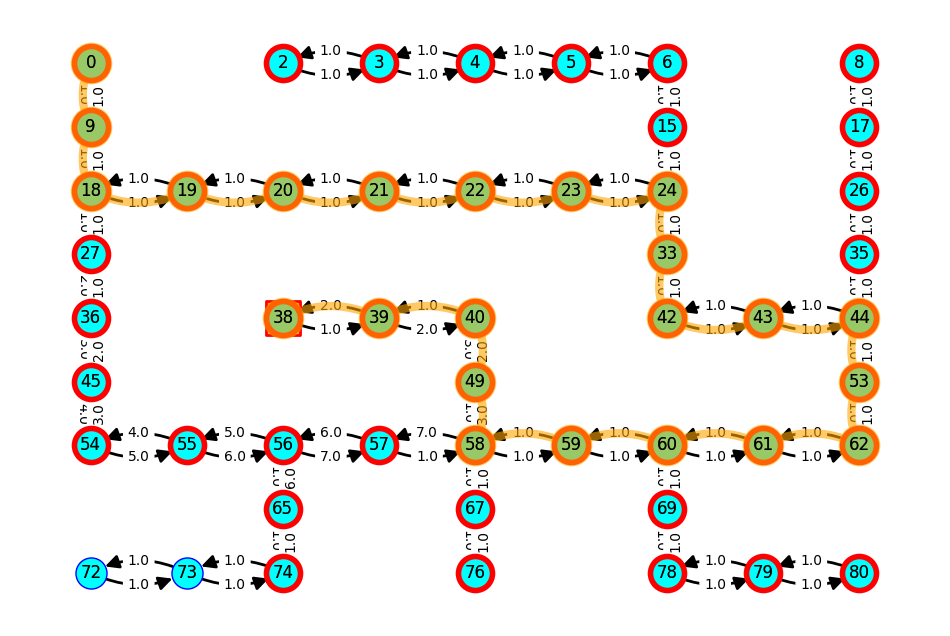

In [8]:
#
# 利用例
#   この利用例が動くように，上記にて dijkstra() や backtrack() を定義してください．
#

# DEBUG
closed_list = dijkstra(maze.graph_edgedict, maze.graph_target, 0)
route, total_cost = backtrack(closed_list, maze.graph_target, 0)

# Draw the Graph
fig2, ax2 = plt.subplots(1, 1, figsize=(12, 8), num=2, clear=True)

maze.draw_graph(highlight_path=route, closed_list=closed_list,
        show_weight=True, ax=ax2, nscale=0.5)

plt.show()

(AI-project-B)=
## (Extra-B) 迷路を探索しよう！！

グラフ探索ばっかりで飽きてきましたか？実際に迷路を最短で解く[^correctness]様子を眺めてみましょう．

:::{tip}
widget で描画する場合は，描画後に Create New View for Cell Output をして，
お好みの場所（例えばJupyterLabのGUIの右側とか）にドッキングさせると，動きを観察しやすくなると思います．
:::

[^correctness]: あなたの実装が正しくて，本資料にバグが無ければ，ですが・・・

### 迷路（とコントローラ）の描画

注：ロボットの画像として [`example/openmouthrobot.png`](example/openmouthrobot.png) が必要です．

In [9]:
from ipywidgets import Button, Output, Label
from ipywidgets import GridspecLayout, Layout, HBox, VBox

if 'fig' in locals():
    fig.clear()
    plt.close(fig)
    del fig

# PLOTAREA(1): MAP
figarea = Output()
with figarea:

    fig, ax = plt.subplots(constrained_layout=True, figsize=(5, 4), num=3, clear=True)
    # fig.canvas.toolbar_position = 'bottom'
    maze.draw_maze(ax=ax)
    plt.show()

# PLOTAREA(2): CONTROLLER
buttons = GridspecLayout(2, 3)
_btn_param = {'width': '60px', 'height': '60px'}
buttons[0, 1] = Button(description='U', layout=Layout(**_btn_param))
buttons[1, 0] = Button(description='L', layout=Layout(**_btn_param))
buttons[1, 1] = Button(description='D', layout=Layout(**_btn_param))
buttons[1, 2] = Button(description='R', layout=Layout(**_btn_param))
    # note: callback functions will be assign after the robot is initialized.

txt_log1 = Label(value="History: ")
txt_log2 = Label(value='FPS: ')
btn_reset = Button(description='Reset', layout=Layout(width='80px', height='60px'))
btn_autorun = Button(description='AutoRun', disabled=True, layout=Layout(width='80px', height='60px'))
    # AutoRunボタンは無効化しています．(disabled=True)
    # 有効化だけしても意味はありません．次に掲載するプログラム例末尾のコメントを参考にしてください．

ui_panel = HBox([
    buttons,
    VBox([
        txt_log1,
        txt_log2,
        HBox([btn_reset, btn_autorun])
    ])
])

all_area = VBox([figarea, ui_panel])
    # VBox を HBox に変えると，地図の右側にコントローラが表示されます．
    # Vertical と Horizontal の違いです．

# Define robot, and assign event-callback functions.
robot = ebai.Robot('example/openmouthrobot.png', maze,
                   fig=fig, ax=ax, zoom=0.2,
                   output=txt_log1)
buttons[0, 1].on_click(robot.req_move_up)
buttons[1, 0].on_click(robot.req_move_left)
buttons[1, 1].on_click(robot.req_move_down)
buttons[1, 2].on_click(robot.req_move_right)
btn_reset.on_click(robot.req_reset)

robot.update_plot(no_wait=False)

# Display all widgets
display(all_area)

START [0, 0] / 0


### 5 FPS (1/5秒毎に画面更新) で動く様子を表示する例

注：冒頭の方のセルで述べたように，`%matplotlib [widget|qt]` いずれかでないと動きません．

タイマー処理については，以下を参考にしてください．

- 参考：https://docs.python.org/ja/3.12/library/time.html#time.perf_counter


In [10]:
import time

# Robot's action plan as Queue
# action_plan = deque([])
    # ロボットの行動計画を Queue に入れます．
    # - 適切なモジュールに置き換えれば，スレッドセーブ（他スレッドからも挿入可能）にもできます．
    #   (deque はスレッドセーフではない．その代わり，シングルスレッドで高速な動作を実現できることが多い．)
    # - この経路は，説明のため，適当に与えていますので，最善ではないかもしれません．念のため．
def mat_to_pos(pos):
    return pos[1] * 9 + pos[0]

def pos_to_mat(val):
    y = val // 9
    x = val % 9
    return (x, y)

def path_to_directions(path_vals):
    directions = []
    for i in range(len(path_vals) - 1):
        x1, y1 = pos_to_mat(path_vals[i])
        x2, y2 = pos_to_mat(path_vals[i+1])
        dx, dy = x2 - x1, y2 - y1

        if dx == 1 and dy == 0:
            directions.append('R')
        elif dx == -1 and dy == 0:
            directions.append('L')
        elif dx == 0 and dy == 1:
            directions.append('D')
        elif dx == 0 and dy == -1:
            directions.append('U')
        else:
            directions.append('?')  # 不明な移動（斜めや飛び越え）
    return directions


def robot_autorun(*args):
    # 関数外にある action_plan 変数を使います．
    # global action_plan

    cur_mat = robot._position
    cur_pos = mat_to_pos(cur_mat)
    closed_list = dijkstra(maze.graph_edgedict, maze.graph_target, cur_pos)
    route, total_cost = backtrack(closed_list, maze.graph_target, cur_pos)

    action_plan = deque(path_to_directions(route))

    # Refresh rate
    INTERVAL = 1.0 / 5.0   # [sec]
        # 画面更新のインターバルを決めておきます
        # - JupyterLab環境だと 10 FPS も出せたら万々歳・・・かな．
        # - なお，今回はロボットの速度は 1.0 [cell/frame] で固定しています．
        #   - 1 時刻フレームごとに，1マス進むの意味です．
        #   - 5 FPSなら，1秒に5マス進みます．言い換えると，0.2秒ごとに1マス進みます．
        #   - 滑らかに動くアニメーションのためには，画面上のキャラクターは1マス単位ではなく，
        #     より細かく移動中も描画したほうが良いですが・・・さすがに講義のレベルを超える
        #     プログラムになるので，今回は入れていません．（本実験の目的とも合致しませんし）

    # Dequeue from the action queue, wait a shorttime, and do the action
    _last_time = time.perf_counter()
    while len(action_plan) > 0:
        # waitしていることを除けば，どこかで見たような while ループでしょう．
        #      --> グラフ探索のループはどういう構造だったでしょうか？

        # Redraw: Message pump for the rendering thread
        fig.canvas.flush_events()
            # - 他スレッドへの意識なしにループすると，計算処理に CPU が100%利用されるため，
            #   処理優先度の低い描画処理が後回しになる --> ループが終わるまで描画されない
            #   (オペレーティングシステムのタイムスライス機構も思い出そう！)
            # - ほとんどの言語系では，sleep() 関数で代用できることも多いことは覚えておくとよい．
            #   --> 無限ループで異常にPCが重くなる時は，ループ内に sleep() を入れる!!

        #
        # wait timer
        #
        if (_interval := (time.perf_counter() - _last_time)) < INTERVAL:
            continue

        _last_time = time.perf_counter()
            # 次のタイマー待ちのため，ここで現在時刻を再入手します．
            # 5 FPS で描画をするなら，計算処理を含めて，0.2秒 (200 ms) しか使えません．

        # ---
        txt_log2.value = f'FPS: {1./_interval:.1f} FPS'
            # これは画面にFPSを表示するための処理．
            # タイマー処理に必須というわけではありません．

        #
        # Process: run your action
        #
        action = action_plan.popleft()
        robot.req_move(action)
            # キューから次のアクションを取り出し，ロボットに与えます．


# Test move
# robot_autorun()

# 参考：
# 上1行はコメントアウトして，以下の2行でボタンにイベントを割り付けてみるのも手です．
btn_autorun.on_click(robot_autorun)
btn_autorun.disabled = False
#   # 少し注意点を．
#   # - 結びつける関数（コールバック関数）は引数を受け取れるようにする必要があります．
#   #   (robot_autorun()関数定義で使いもしない引数 *arg が書いてあるのは，そのため．)
#   # - action_plan はキューなので，robot_autorun()が終わった後は空っぽです．
#   #   - GUIの上で再実行したいなら，キューに改めて挿入する必要があります．
#   #   - 例えば，ロボットの現在位置からゴールまで(再)探索する・・・とかです．


```{exercise}
上記例のように方向を意味する文字を `robot.req_move()` に与えることで，ロボットを動かせます．

**D**own (`'D'`), **U**p (`'U'`), **L**eft (`'L'`), **R**ight (`'R'`) です [^wasd]．

[^wasd]: 小文字で w, a, s, d でも動きます．詳細は説明しません．

変数 `action_plan` として用意したキューは，グラフ探索における `route` をもとに変換することで得られるでしょう．  
適切な変換関数を自分で考えて，任意の迷路において，ロボットをゴールに導けるようにしましょう！！

:::{hint} （実装のヒント）
スライド資料（AISP20xx_AI-2.pdf）の巻末を参照のこと．
:::
```

```{warning}
キーボードイベントを拾う方法を，ググれば見つけられれるかもしれません．
JupyterLab環境で実装しようとすると大変なことが起こるので，全くお勧めしません．

例えば，`D` は JupyterLabのGUIとして「セル削除」なので，そちらが優先されます．
```

(AI-project-C)=
## (Extra-C) A\* algorithm による探索の実装

### 概要

Dijkstra's algorithm が完成していれば，A\* algorithm にすること自体は，それほど難しくありません．  
やっかいなのは，ヒューリスティック関数の設計，です．

### コストの拡張

A\* algorithm における，ノード$n$の評価関数は $f(n) = g(n) + \hat{h}(n)$ です．

つまり，Priority Queue におけるコスト値の比較において，$g(n)$ だけではなく，$\hat{h}(n)$ も加味した値で比較してやればよいだけです．

- $\hat{h}(n)$ は，これまでの $g(n)$のように加算していくものではありません．遷移先ノード$n$のゴールまでの近さを推定する値です．
  - [ ] 探索グラフの状態ノードには，`cost` メンバ以外に，`eval_score` のような別メンバを用意したほうが管理しやすいでしょう．
- Dijkstra's algorithm では，Unique Priority Queue への挿入をしていますが，この関数も改造が必要でしょう．
  - [ ] 例えば，優先度は `cost` 基準ではなく，`eval_score` 基準にする必要があるでしょう．
- $\hat{h}(n)$ により，Dijkstra's algorithm が暗黙的に満たしていた制約（AI講義スライド#52）が満たされない場合があります．
  - これまでは制約を満たしていたため，クローズドリストに既存のノードは追加しない，としていました．
  - [ ] 処理 `(7-1)` の改造が必要です．
    - 具体的には，クローズドリストの既存ノードより `cost` の小さいノードが候補として現れたのであれば，  
      クローズドリストの既存ノードを削除し，候補ノードはオープンリストとして加える，という操作にします．  
  - [ ] 処理 `(5)` の改造も必要です．
    - オープンリストの中に，ゴールと目される状態ノードの `cost` より低い状態ノードが存在する限り，最善手が残っている可能性があります．
    - ゴール候補が見つかった時に，オープンリストの枝刈り（cf. ゲーム探索木におけるαカットやβカット）をすると，無駄な探索を省けるでしょう．

### ヒューリスティック関数$\hat{h}(n)$の設計

最も大きな問題は，$\hat{h}(n)$をどう与えるか，でしょう．  

迷路問題においては，迷路として表示された座標系における候補ノードと目標ノードの距離を
何らかの計算方法[^nosearch]で計算し，利用することが，しばしば行われます．  
これにより，ゴールに近いノードを優先的に探索する・・・という考えが導入できますので，早く探索を終えられそうです．  

[^nosearch]: dijkstra's algorithmをゴールからスタートに適用すれば正確な距離が・・・と思うかもしれません．
    ですが，A\*で利用することを考えるならば，それは鶏と卵の問題になってしまいますね．
    また，目的からしても，dijkstra's algorithmよりも計算量の少ない方法でないと，導入の意味もありません．

距離としては，
[マンハッタン距離 ($L^1$ distance)](https://en.wikipedia.org/wiki/Taxicab_geometry)
や
[ユークリッド距離 ($L^2$ distance)](https://en.wikipedia.org/wiki/Euclidean_distance)
が，しばしば用いられます．

ただし，問題はそんな単純ではないかもしれません．実装してみるとわかることもあるでしょう．（参考：AI講義スライド#43）

:::{exercise}
適切と思われるヒューリスティック関数 $\hat{h}(n)$ を考えてみましょう．理由も添えて．

```{hint}
唯一絶対のアルゴリズム（≒最強のアルゴリズム(?)）なんて都合の良いものは存在しません [^nofreelunch]．

何らかの前提（あるいは，探索過程の途中状況）を様々に考え，各前提において有利に働くヒューリスティック関数の特徴を考え，状況ごとに整理してみるとよいでしょう．

この exercise は，より高度な実験に必要な「仮説」を示すことを求めています．  
仮説を立てるには，単なる知識だけからの推察ではなく，これまでに行った実験結果の考察を通して得ることのほうが望ましいです．
```
:::

[^nofreelunch]: あらゆる物事に唯一の答えがある（自分以外の誰かの言うことは常に正しい）と信じている人には，酷な話かもしれませんね．
    (cf. [ノーフリーランチ定理](https://ja.wikipedia.org/wiki/%E3%83%8E%E3%83%BC%E3%83%95%E3%83%AA%E3%83%BC%E3%83%A9%E3%83%B3%E3%83%81%E5%AE%9A%E7%90%86))．


:::{exercise}
実際に，A\*探索として実装しましょう．そして，実験を通して，仮説として立てているだろうメリットだけでなく，デメリットについても考察してみましょう．

```{hint}
座学で学んだことのある内容かもしれません．あるいは，上記の説明から，なんとなく読み取れる人もいるかもしれません．

計算機を使った「実験」をしましょう．実験に必要な仮説は，すでに立てました．仮説の正しさは，実験で検証してください．
```

:::

In [95]:
import heapq
import math

# A*アルゴリズムのためのデータクラス
@dataclass
class Astate:
    id: int
    cost: float
    # eval_score = f(n) = g(n) + h(n)
    eval_score: float
    parent_id: int

    # ヒープの優先順位は g(n) + h~(n) が小さい順
    def __lt__(a, b):
        a_sum = a.eval_score
        b_sum = b.eval_score
        if a_sum != b_sum:
            return a_sum < b_sum

def pos_to_mat(val):
    y = val // 9
    x = val % 9
    return (x, y)

In [129]:
# マンハッタン距離
# def heuristic_func(node_a, node_b):
#     ax, ay = pos_to_mat(node_a)
#     bx, by = pos_to_mat(node_b)
#     return abs(ax - bx) + abs(ay - by)

# ユークリッド距離
# def heuristic_func(node_a, node_b):
#     ax, ay = pos_to_mat(node_a)
#     bx, by = pos_to_mat(node_b)
#     return math.sqrt((ax - bx)**2 + (ay - by)**2)

# マンハッタン距離＋bias ver1
# def heuristic_func(node_a, node_b):
#     ax, ay = pos_to_mat(node_a)
#     bx, by = pos_to_mat(node_b)
#     return abs(ax - bx) + abs(ay - by)**3

# マンハッタン距離＋bias ver2
def heuristic_func(node_a, node_b, cost):
    ax, ay = pos_to_mat(node_a)
    bx, by = pos_to_mat(node_b)
    return abs(ax - bx) + abs(ay - by)**3 + cost**1.5

# ユークリッド距離＋指数
# def heuristic_func(node_a, node_b):
#     ax, ay = pos_to_mat(node_a)
#     bx, by = pos_to_mat(node_b)
#     distance = math.sqrt((ax - bx)**2 + (ay - by)**2)
#     return math.pow(1.6, distance)

# ユークリッド距離の自然対数とマンハッタン距離を合計した値
# def heuristic_func(node_a, node_b):
#     ax, ay = pos_to_mat(node_a)
#     bx, by = pos_to_mat(node_b)
#     manhattan = abs(ax - bx) + abs(ay - by)
#     euclidean = math.sqrt((ax - bx)**2 + (ay - by)**2)
#     h_score = euclidean + manhattan
#     return h_score

In [83]:
def Astar(graph_edgedict, graph_target, graph_start):
    open_list = []
    heapq.heapify(open_list)
    heapq.heappush(open_list, Astate(graph_start, cost=0, eval_score = heuristic_func(graph_start, graph_target, 0), parent_id=-1))
    closed_list = dict()

    loop_count = 0
    while len(open_list) > 0 and loop_count < 200:
        loop_count += 1
        cur_state = heapq.heappop(open_list)

        # 処理5の改造　取り出したidがゴールなら探索終了
        if cur_state.id == graph_target:
            closed_list[cur_state.id] = cur_state
            break

        closed_list[cur_state.id] = cur_state


        candidate_state_nodes = graph_edgedict[cur_state.id]

        for _dst_id, _weight in candidate_state_nodes:
            g_new = cur_state.cost + _weight
            h_new = heuristic_func(_dst_id, graph_target, _weight)
            candidate_state = Astate(
                id=_dst_id,
                cost=g_new,
                eval_score=g_new+h_new,
                parent_id=cur_state.id
            )

            if candidate_state.id in closed_list:
                # 処理7-1の改造　探索してきた経路が最短とは限らないから，取り出す作業
                if g_new < closed_list.get(candidate_state.id, Astate(id=-1, cost=-1, eval_score = 0, parent_id=-9)).cost:
                    # dict型の削除方法
                    del closed_list[candidate_state.id]
                    candidate_state.eval_score = g_new + h_new 
                    heapq.heappush(open_list, candidate_state)
                continue

            _exist_state = [x for x in open_list if x.id == candidate_state.id]
            _exist_state = _exist_state[0] if _exist_state else None
            if _exist_state is None:
                heapq.heappush(open_list, candidate_state)
            # A* では，g(n)+h(n) で評価する
            elif candidate_state.eval_score < _exist_state.eval_score:
                open_list.remove(_exist_state)
                heapq.heappush(open_list, candidate_state)
            else:
                pass

    return closed_list

In [7]:
def backtrack(closed_list, graph_target, graph_start):
    route = deque([])
    bt_node_id = graph_target
    bt_node_cost = 0

    while bt_node_id != graph_start:
        route.appendleft(bt_node_id)
        bt_node_id = closed_list.get(bt_node_id, Astate(id=-1, cost=-1, eval_score = 0, parent_id=-9)).parent_id
        bt_node_cost += closed_list.get(bt_node_id, Astate(id=-1, cost=-1, eval_score = 0, parent_id=-9)).cost

    if bt_node_id == graph_start:
        pass
    else:
        # Backtracking失敗
        print(f'Backtracking: Failed: Route = {list(route)}?')

    route.appendleft(graph_start)
    return list(route), bt_node_cost

/tmp/ipykernel_26637/2904455472.py:12: UserWarning: Ignoring specified arguments in this call because figure with num: 2 already exists
  fig2, ax2 = plt.subplots(1, 1, figsize=(12, 8), num=2, clear=True)


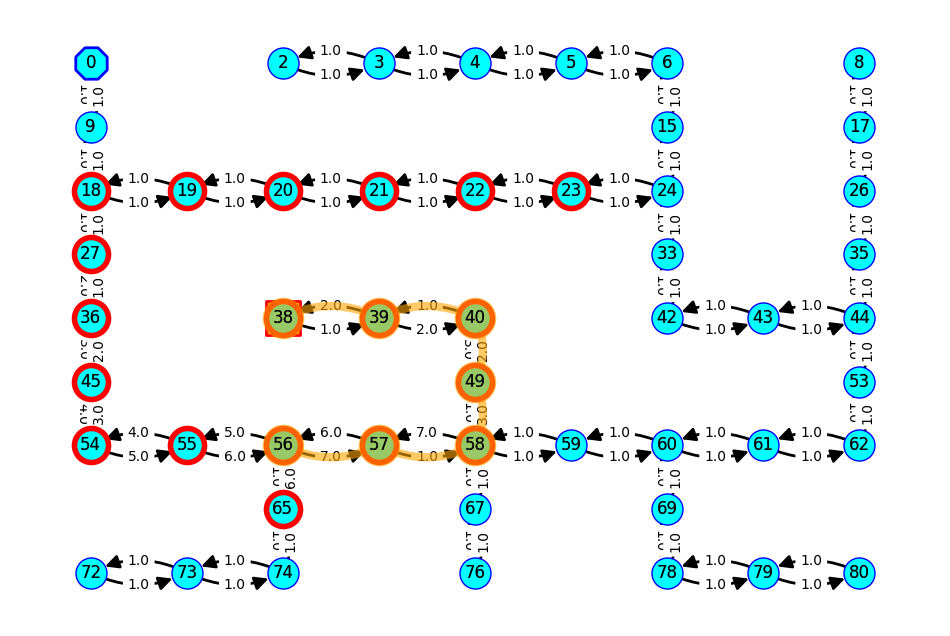

In [131]:
#
# 利用例
#   この利用例が動くように，上記にて dijkstra() や backtrack() を定義してください．
#

# DEBUG
graph_start = 56
closed_list = Astar(maze.graph_edgedict, maze.graph_target, graph_start)
route, total_cost = backtrack(closed_list, maze.graph_target, graph_start)

# Draw the Graph
fig2, ax2 = plt.subplots(1, 1, figsize=(12, 8), num=2, clear=True)

maze.draw_graph(highlight_path=route, closed_list=closed_list,
        show_weight=True, ax=ax2, nscale=0.5)

plt.show()

:::{attention}
本資料はここまでです．
:::